#### Genetic Programming: Machine Code GP example
CE310 Evolutionary Computation and Genetic Programming<br>
Reinhold Scherer, Spring 2021, Unit 9 & 10

Original code by Riccardo Poli

Machine Code GP Example
(0, 3522, -1.582242533027578, -1.634811411318939, -1.634811411318939, -1.634811411318939, -4158.304332906829)
(1, 7128, -1.4747971433443934, -1.634811411318939, -1.634811411318939, -1.634811411318939, -128076659304.25648)
(2, 501, -1.4058600836760693, -1.581048997841118, -1.583512818741864, -1.634811411318939, -879219.7004826214)
(3, 8470, -1.257021250017643, -1.473974921122171, -1.4866806841473634, -1.581048997841118, -1.2812121907775874e+29)
(4, 302, -1.23059690496702, -1.4468156041104092, -1.473974921122171, -1.4747971433443934, -2.4235931504547783e+19)
(5, 3095, -1.223198083374501, -1.287640756601845, -1.3787715723143783, -1.4468156041104092, -1.6674248606045637e+21)
(6, 3284, -1.2172272897237073, -1.257021250017643, -1.257021250017643, -1.3301950175129593, -4.398000060418468e+18)
(7, 944, -1.1968573759158816, -1.257021250017643, -1.257021250017643, -1.257021250017643, -4.8813055349069545e+25)
(8, 2497, -1.1858113302714588, -1.257021250017643, -1.25702125001

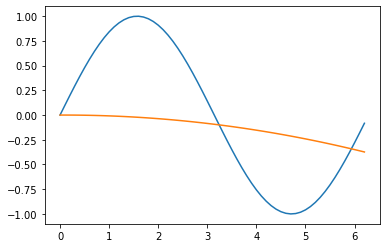

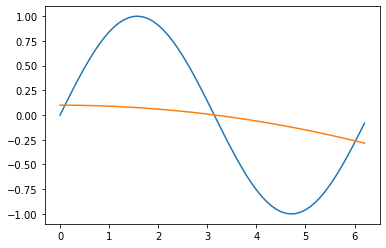

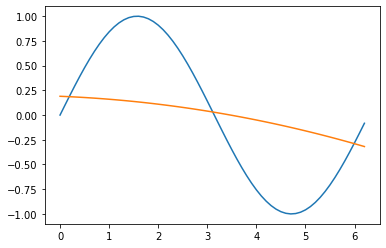

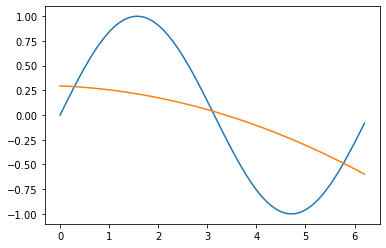

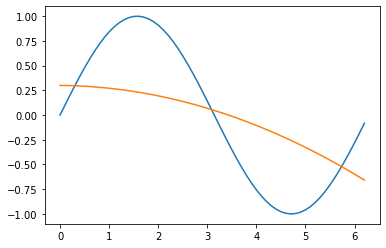

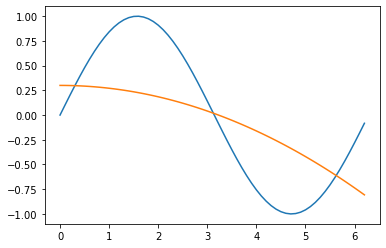

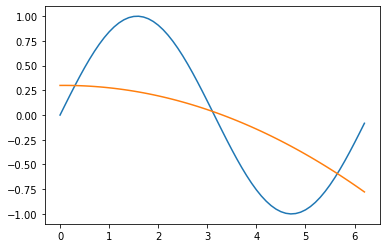

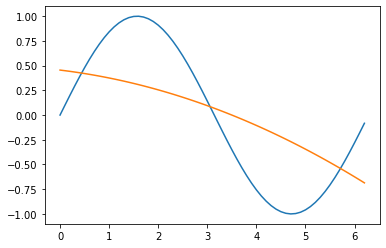

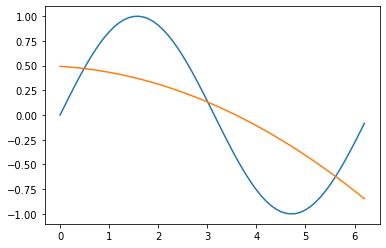

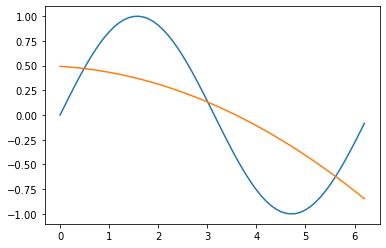

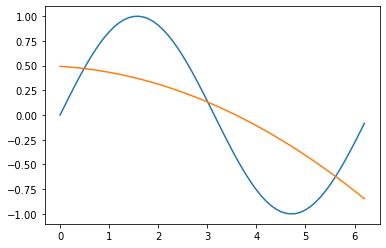

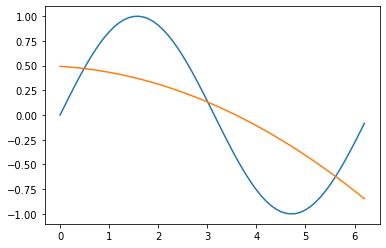

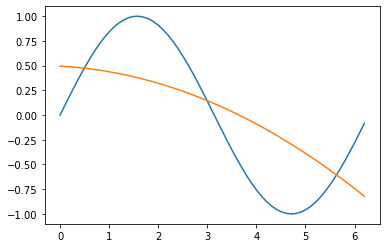

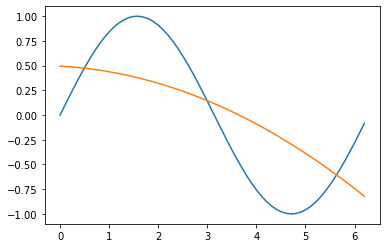

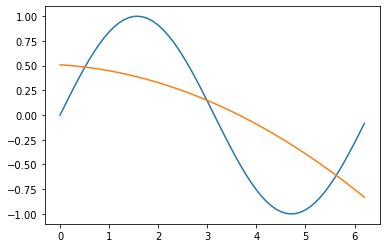

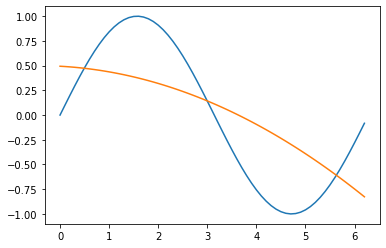

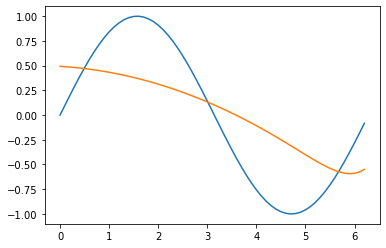

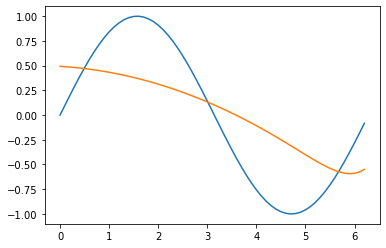

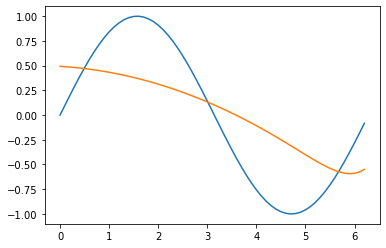

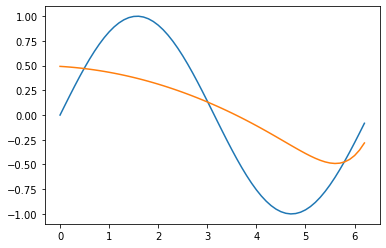

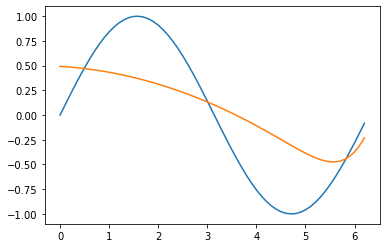

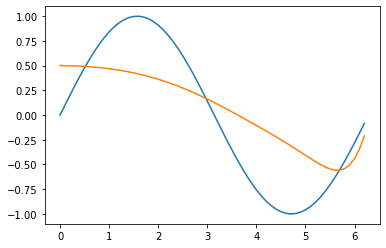

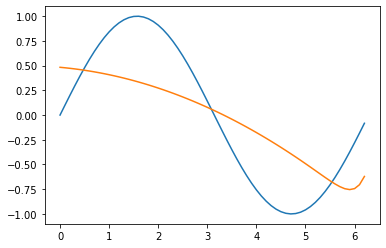

<ipython-input-4-f47650ab80ca>:44: RuntimeWarning: overflow encountered in multiply
  fn(lambda: N.multiply(s.r[1], s.r[1], s.r[1]), 'r1 <- r1 * r1', 'r1=r1*r1'),
<ipython-input-4-f47650ab80ca>:43: RuntimeWarning: overflow encountered in multiply
  fn(lambda: N.multiply(s.r[0], s.r[0], s.r[0]), 'r0 <- r0 * r0', 'r0=r0*r0'),
<ipython-input-4-f47650ab80ca>:43: RuntimeWarning: overflow encountered in multiply
  fn(lambda: N.multiply(s.r[0], s.r[0], s.r[0]), 'r0 <- r0 * r0', 'r0=r0*r0'),
<ipython-input-4-f47650ab80ca>:43: RuntimeWarning: overflow encountered in multiply
  fn(lambda: N.multiply(s.r[0], s.r[0], s.r[0]), 'r0 <- r0 * r0', 'r0=r0*r0'),
<ipython-input-4-f47650ab80ca>:43: RuntimeWarning: overflow encountered in multiply
  fn(lambda: N.multiply(s.r[0], s.r[0], s.r[0]), 'r0 <- r0 * r0', 'r0=r0*r0'),


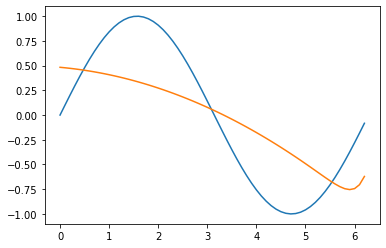

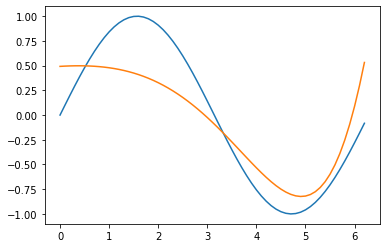

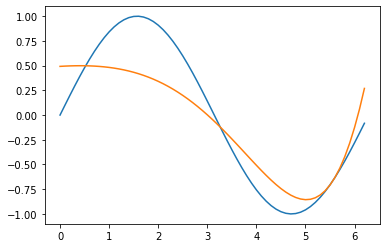

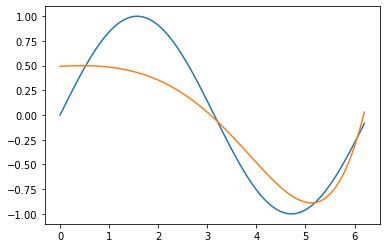

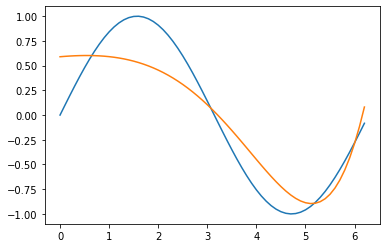

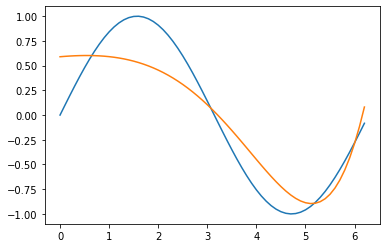

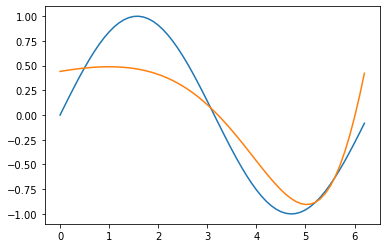

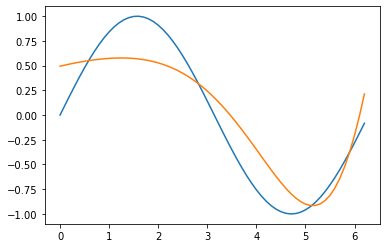

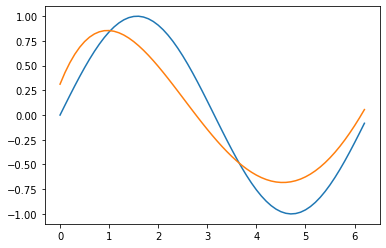

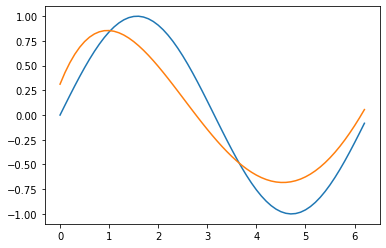

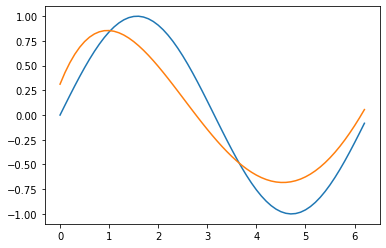

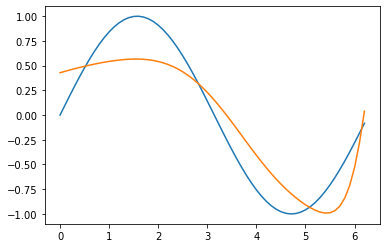

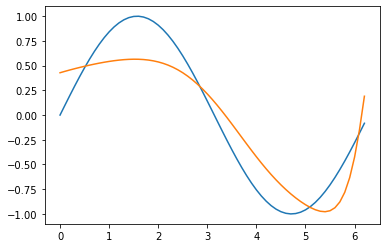

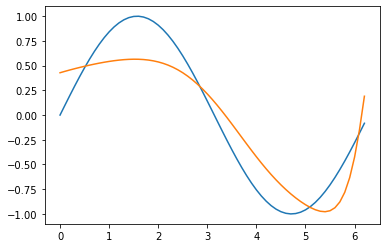

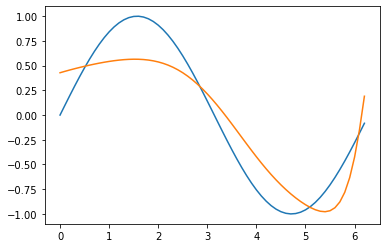

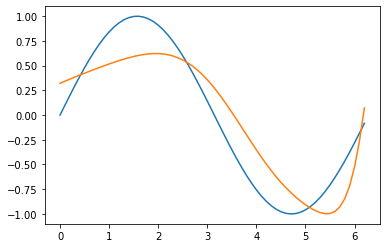

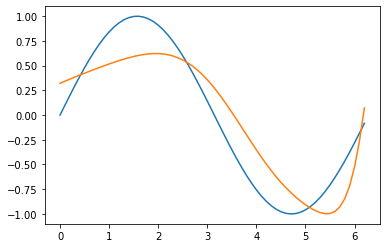

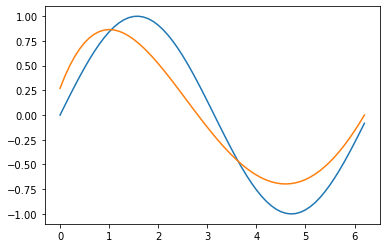

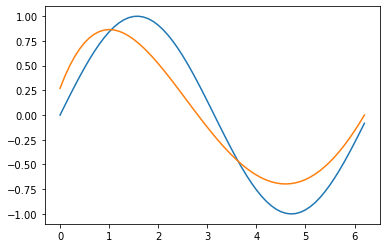

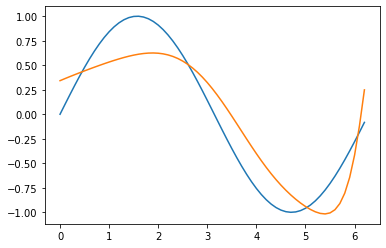

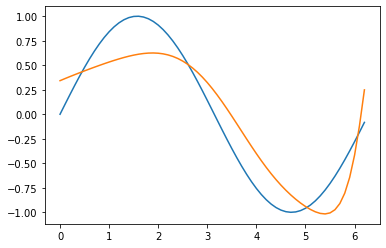

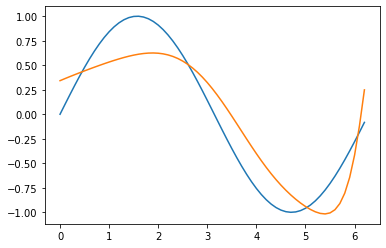

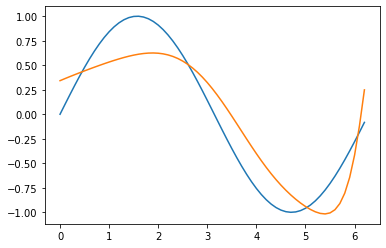

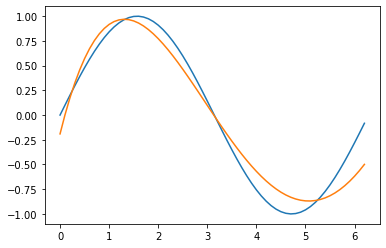

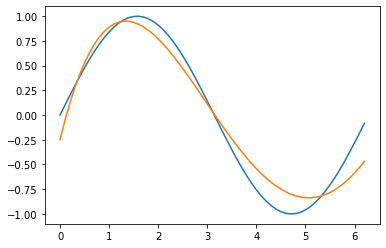

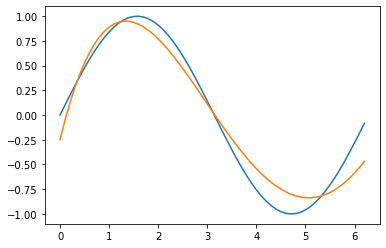

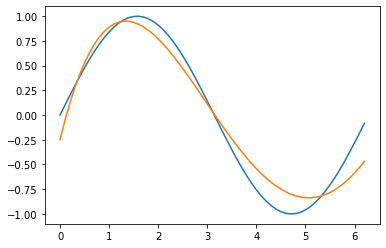

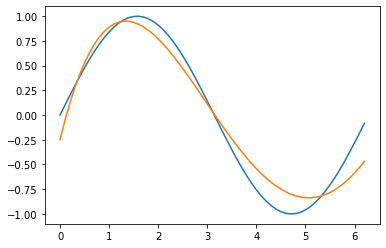

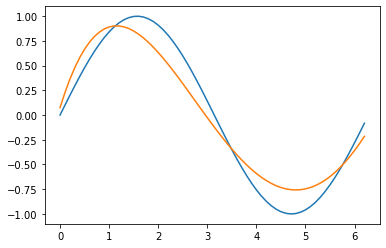

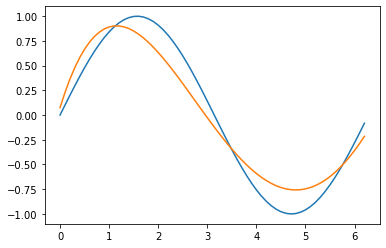

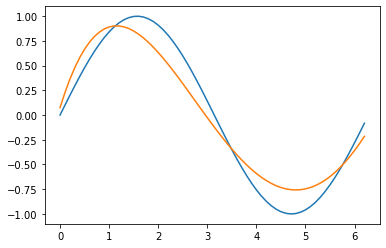

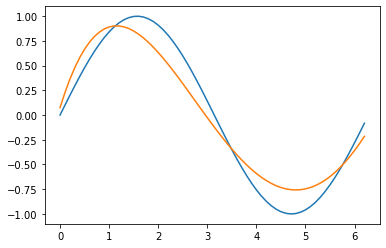

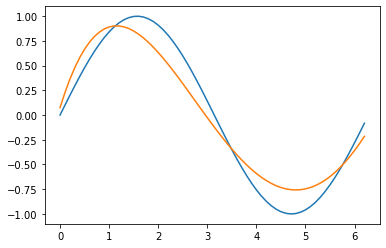

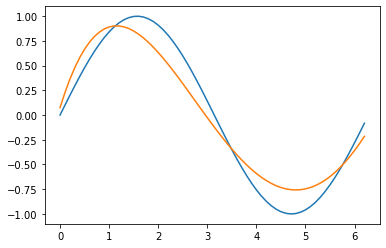

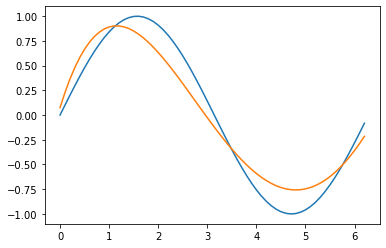

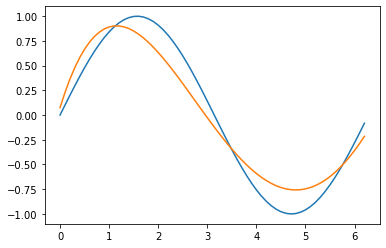

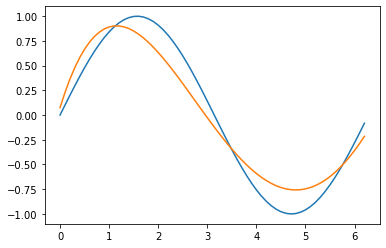

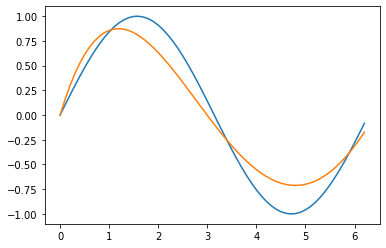

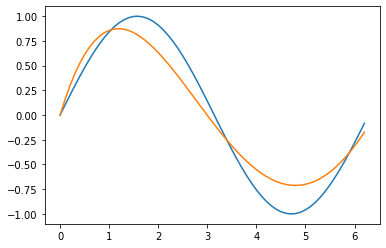

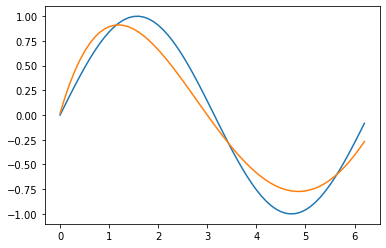

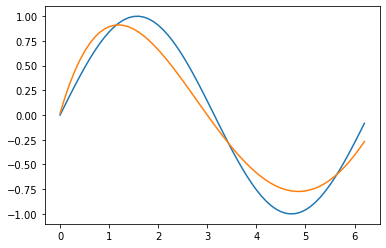

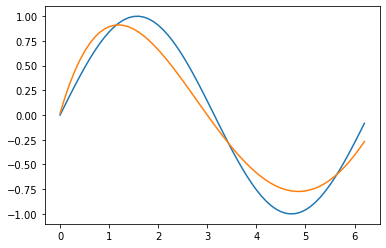

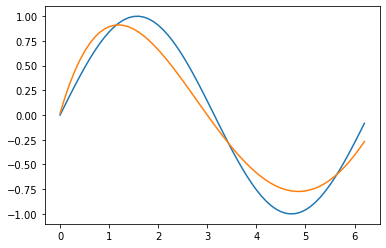

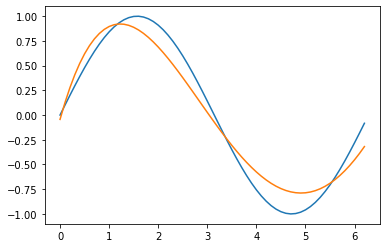

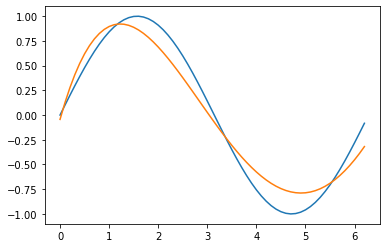

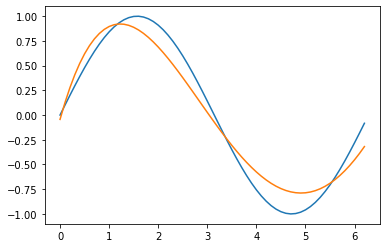

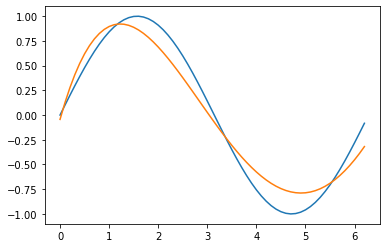

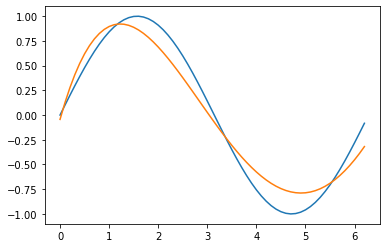

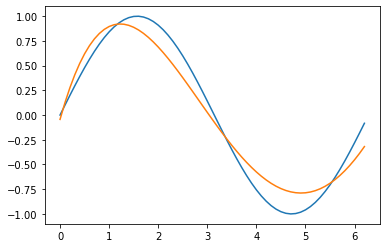

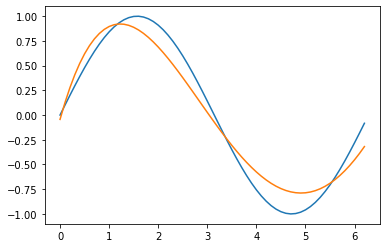

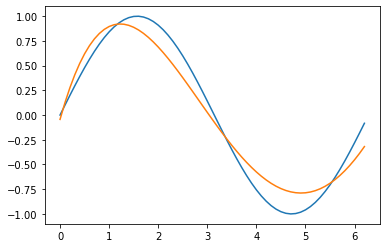

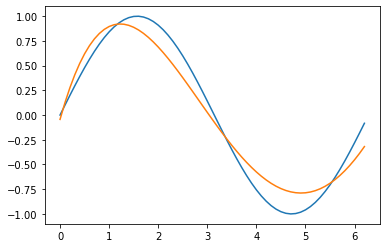

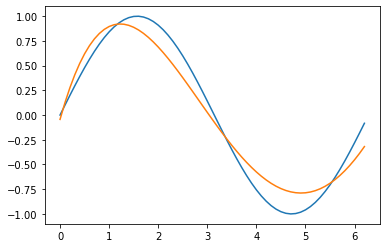

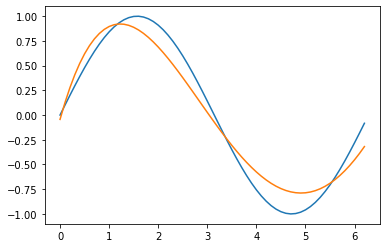

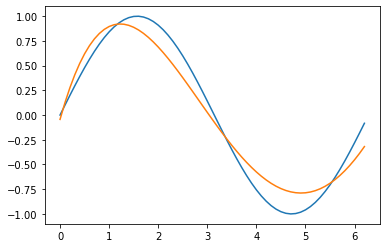

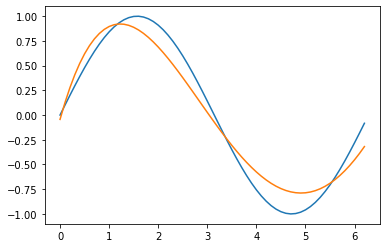

In [4]:
# -*- coding: utf-8 -*-
# from __future__ import division

import numpy as N

def fn(f, t, s=""):
    f.t = t
    f.s = s
    return f

class interpreter:
    def __init__(self, vlen, nreg=3):
        self.r = [N.empty((vlen,)) for i in range(nreg)]
        self.__tmp_r = N.empty((vlen,))
        self.init_ops()

    def init_regs(self):
        for r in self.r:
            r.fill(0)

    def init_ops(self):
        s = self
        def store(i):
            s.r[i], s.r[-1] = s.r[-1], s.r[i]
        self.ops = [
            fn(lambda: int,                                'NOP'),
            fn(lambda: s.r[0].fill(0),                     'r0 <- 0',       'r0=0'),
            fn(lambda: s.r[1].fill(0),                     'r1 <- 0',       'r1=0'),
            fn(lambda: s.r[0].fill(.5),                    'r0 <- .5',      'r0=.5'),
            fn(lambda: s.r[1].fill(-.5),                   'r1 <- -.5',     'r1=-.5'),
            fn(lambda: s.r[0].fill(-.1),                   'r0 <- -.1',     'r0=-.1'),
            fn(lambda: s.r[1].fill(.1),                    'r1 <- .1',      'r1=.1'),
            fn(lambda: s.r[0].fill(-1),                    'r0 <- -1',      'r0=-1'),
            fn(lambda: s.r[1].fill(1),                     'r1 <- 1',       'r1=1'),
            fn(lambda: N.negative(s.r[0], s.r[0]),         'r0 <- -r0',     'r0=-r0'),
            fn(lambda: N.negative(s.r[1], s.r[1]),         'r1 <- -r1',     'r1=-r1'),
            fn(lambda: N.add(s.r[0], s.ri, s.r[0]),        'r0 <- r0 + ri', 'r0=r0+ri'),
            fn(lambda: N.add(s.r[1], s.ri, s.r[1]),        'r1 <- r1 + ri', 'r1=r1+ri'),
            fn(lambda: N.add(s.r[0], s.r[1], s.r[0]),      'r0 <- r0 + r1', 'r0=r0+r1'),
            fn(lambda: N.add(s.r[0], s.r[1], s.r[1]),      'r1 <- r0 + r1', 'r1=r0+r1'),
            fn(lambda: N.multiply(s.r[0], s.r[1], s.r[0]), 'r0 <- r0 * r1', 'r0=r0*r1'),
            fn(lambda: N.multiply(s.r[0], s.r[1], s.r[1]), 'r1 <- r0 * r1', 'r1=r0*r1'),
            fn(lambda: N.multiply(s.r[0], s.r[0], s.r[0]), 'r0 <- r0 * r0', 'r0=r0*r0'),
            fn(lambda: N.multiply(s.r[1], s.r[1], s.r[1]), 'r1 <- r1 * r1', 'r1=r1*r1'),
            fn(lambda: store(0),                           'rs <-> r0',     'rs,r0=r0,rs'),
            fn(lambda: store(1),                           'rs <-> r1',     'rs,r1=r1,rs'),
        ]


    def lstPython(self, instr, str=False):
        l = [self.ops[i].s for i in instr if self.ops[i].s]
        if str:
            l = "\n".join(l)
        return l


    def evaluate(self, instr, v):
        self.init_regs()
        assert v.dtype == float
        self.ri = v
        for i in instr:
            self.ops[i]()
        return self.r[0]


class gp:
    def __init__(self, pop_size, prog_len, num_op, **params):
        self.pop = [N.zeros((prog_len,), dtype=int) for i in range(pop_size)]
        self.num_op = num_op
        self.p = {'mut_prob':.05, 'xover_pts':2, 'tourn_size':3}
        self.p.update(params)
        self.pop_fitness = N.zeros((pop_size,))
        self.fitness = lambda x: 0 # virtual method fitness

    # basically just randomly pre-mutates the population, by a given probability
    def randomize(self, prob=None):
        for i,p in enumerate(self.pop):
            self.mutation(p, prob)
            self.pop_fitness[i] = self.fitness(p)


    # randomly mutates a random number of entries (just in some of them)
    def mutation(self, p, prob=None):
        prob = self.p['mut_prob'] if prob is None else prob
        r = N.nonzero(N.random.rand(len(p)) < prob)[0]
        p[r] = N.random.randint(self.num_op, size=len(r))


    def crossover(self, p1, p2):
        ml = len(p1) # or min(len(p1), len(p2)) if variable length
        x = N.random.randint(ml, size=self.p['xover_pts'])
        mask = N.zeros((ml), dtype=bool)
        mask[x] = True
        mask = N.logical_xor.accumulate(mask) # basically like a moving window across the array
        #      [F, F, F, F, F] assume x = [1,3]
        #  x = [F, T, F, T, F]
        #xor = [F, T, F, T, F] # basically we get the trues where wer want to flip
        o1 = p1.copy()
        o1[mask] = p2[mask]
        o2 = p2.copy()
        o2[mask] = p1[mask]
        return (o1, o2)


    def tournament(self, neg=False): # pass true if we want to minimize fitness
        # an individual can be sampled more than once
        r = N.random.randint(len(self.pop), size=self.p['tourn_size'])
        f = self.pop_fitness[r]
        i = f.argmin() if neg else f.argmax() # if we want minimum, get argmin. maximum: argmax.
        return r[i]


    def generation(self):
        for i in range(len(self.pop)): # //2
            if N.random.rand() < .1: # cloning
                # pick individual for reproduction, reinsert into population.
                # p1 = self.tournament()
                # self.pop_fitness[p1] = self.pop_fitness[p1] * 0.8 + 0.2 * self.fitness(self.pop[p1])
                continue
            # reproduction
            m = None
            p1 = self.pop[self.tournament()]
            p2 = self.pop[self.tournament()]
            if N.array_equal(p1, p2):
                # discourage mating identical individuals
                p2 = self.pop[N.random.randint(len(self.pop))]
                if N.array_equal(p1, p2):
                    # if you insist...
                    m = 2 * self.p['mut_prob'] # if same parent twice, we try to mutate it instead.

            # this is the crossover.
            o1, o2 = self.crossover(p1, p2)
            self.mutation(o1, m)
            # and the mutation

            #self.mutation(o2, m)
            d1 = self.tournament(neg=True) # trying to pick worst individual
            #d2 = self.tournament(neg=True)
            self.pop[d1] = o1 # we replace that individual.
            #self.pop[d2] = o2
            self.pop_fitness[d1] = self.fitness(o1) # and update the fitness.
            #self.pop_fitness[d2] = self.fitness(o2)


    def stats(self):
        i = N.argsort(self.pop_fitness)
        i = i[((len(self.pop_fitness) - 1) / 4 * N.arange(4., -1., -1.)).astype(int)]
        return (i[0],) + tuple(self.pop_fitness[i])

            
def dist(x,y):
    d = N.absolute(x - y)
    return d.mean() + d.max()

import matplotlib
import pylab as P

print("Machine Code GP Example")
v = N.arange(0,6.28,0.1)
c = interpreter(v.shape[0])
g = gp(pop_size=10000, prog_len=50, num_op=len(c.ops), mut_prob=.05, tourn_size=10)

f = N.sin
g.fitness = lambda p: -dist(c.evaluate(p, v), f(v)) # overriding the fitness function
g.randomize(.15) # going through all the population, mutating the individuals with a given probability of .15
P.ion()
P.figure()
try:

    for i in range(1 << 30):
        g.generation()
        print((i,) + g.stats())
        best = g.pop[g.stats()[0]]
        P.clf()
        P.plot(v,f(v))
        P.plot(v,c.evaluate(best, v))
        P.draw()
        P.pause(0.01)
except KeyboardInterrupt:
    print("\nBest program:\n",c.lstPython(best, str=True))
